## 다중 분류
- wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [5]:
from sklearn.datasets import load_wine
wine=load_wine()
wine.data.shape

(178, 13)

In [6]:
# x 데이터는 표준화
from sklearn.preprocessing import StandardScaler
wine_std=StandardScaler().fit_transform(wine.data)

In [8]:
# y 데이터는 원 핫 인코딩
from tensorflow.keras.utils import to_categorical
# 원핫인코딩으로 y도 2차원 이상이 돼서 대문자로 써줌
Y= to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size=0.2, random_state=seed
)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

- 모델 정의/설정/학습/평가

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model=Sequential([
    Dense(30,input_dim=13,activation='relu'), 
    Dense(12,activation='relu'),   #은닉층
    Dense(3,activation='softmax') #출력층 - 노드 갯수 =3 (Y의 종류(N)수.)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 다중분류시 손실 함수 ='categorical_crossentropy'
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy']) #옵티마이저


In [ ]:
hist=model.fit(X_train,Y_train, validation_split=0.2,
               epochs=100,batch_size=100)

In [14]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1301 - accuracy: 0.9722


[0.13005691766738892, 0.9722222089767456]

- 학습과정 시각화

In [15]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1, len(y_acc)+1)

Text(0.5, 0, 'Epoch')

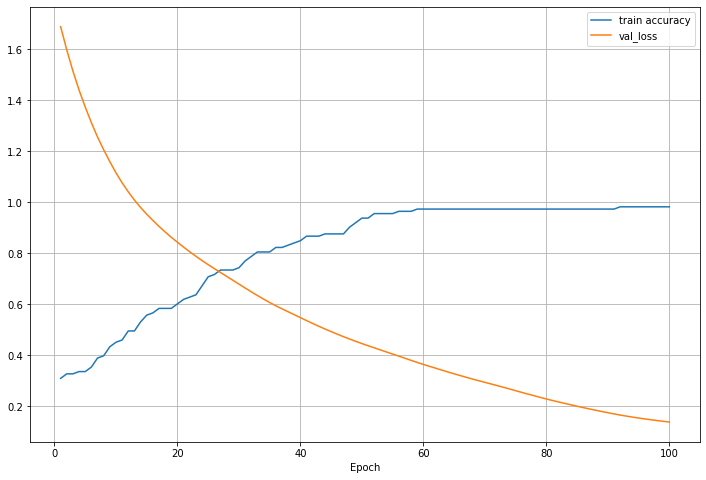

In [16]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc,label='train accuracy')
plt.plot(xs,y_vloss,label='val_loss')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')
#대체로 val-loss는 한번 고개를 드는데 
#얘는 아직 안 든 거 보면 학습 더 많이 하면 더 낮아질 여지가 있다. 

- epoch 횟수 늘려보기
-- 이 때는 이전의 학습을 초기화시켜야 함. 이미 100번한 학습이 남아있기 때문.

In [31]:
model2=Sequential([
    Dense(30,input_dim=13,activation='relu'), 
    Dense(12,activation='relu'),   #은닉층
    Dense(3,activation='softmax') #출력층 - 노드 갯수 =3 (Y의 종류(N)수.)
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                420       
                                                                 
 dense_10 (Dense)            (None, 12)                372       
                                                                 
 dense_11 (Dense)            (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [32]:
model2.compile('adam',loss='categorical_crossentropy',metrics=['accuracy']) #옵티마이저


In [33]:
hist2=model2.fit(X_train,Y_train, validation_split=0.2,
               epochs=1000,batch_size=100,verbose=0)

In [34]:
model2.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 9.7766e-04 - accuracy: 1.0000


[0.000977662275545299, 1.0]

In [35]:
y_acc2=hist2.history['accuracy']
y_vloss2=hist2.history['val_loss']
xs2=np.arange(1, len(y_acc2)+1)

Text(0.5, 0, 'Epoch')

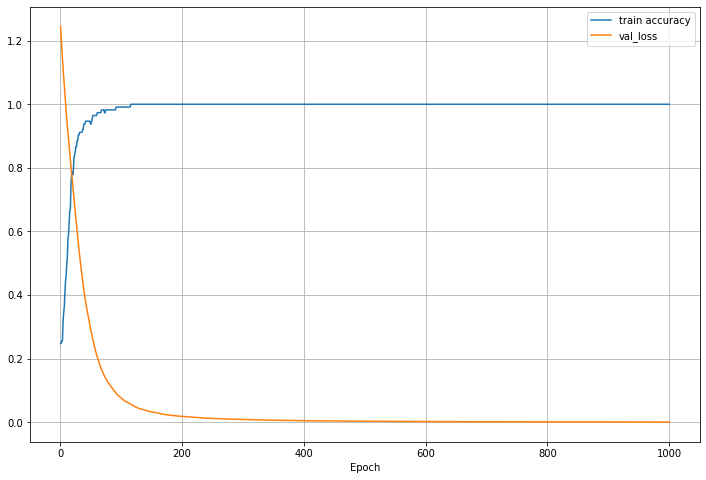

In [36]:
plt.figure(figsize=(12,8))
plt.plot(xs2,y_acc2,label='train accuracy')
plt.plot(xs2,y_vloss2,label='val_loss')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

- 모델 저장, 불러오기

In [37]:
model2.save('wine.h5')

In [41]:
from tensorflow.keras.models import load_model
my_model = load_model('wine.h5')

In [42]:
my_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 9.7766e-04 - accuracy: 1.0000


[0.000977662275545299, 1.0]

- 실제 데이터로 테스트

In [43]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [45]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [47]:
my_model.evaluate(wine_std[100].reshape(1,-1),Y[100].reshape(1,-1))

1/1 [==============================] - 0s 43ms/step - loss: 2.6226e-06 - accuracy: 1.0000


[2.622600959512056e-06, 1.0]